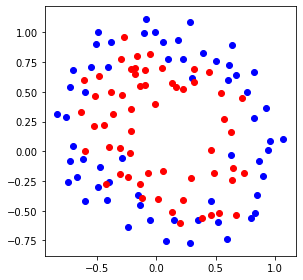

In [77]:
import numpy as np
import matplotlib.pyplot as plt

data    = np.genfromtxt("data-nonlinear.txt", delimiter=',')

pointX  = data[:, 0]
pointY  = data[:, 1]
label   = data[:, 2]

pointX0 = pointX[label == 0]
pointY0 = pointY[label == 0]

pointX1 = pointX[label == 1]
pointY1 = pointY[label == 1]

plt.figure()
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

# Write down the high dimensional function

$g(x, y; \theta) = \theta_{0} + \theta_{1} * x + \theta_{2} * x^{2} + \theta_{3} * y + \theta_{4} * y^{2} + \theta_{5} * xy + \theta_{6} * x^{2}y^{2} + \theta_{7} * x^{1/2} + \theta_{8} * y^{1/2} + \theta_{9} * x^{1/2}y^{1/2} + \theta_{10} * x^{1/3} + \theta_{11} * y^{1/3} + \theta_{12} * x^{1/3}y^{1/3} + \theta_{13}*x^{2/3}y^{1/3} + \theta_{14}*x^{1/3}y^{2/3} + \theta_{15}*x^{2/3}y^{2/3}   $

In [78]:
def g(t0, t1, t2, t3, t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15, x, y):
    return t0 + t1 * x + t2 * (x ** 2) + t3 * y + t4 * (y ** 2) + t5 * x*y + t6 * (x**2)*(y**2) + t7 * (x**1/2)+ t8 * (y**1/2) + t9 * (x**1/2) * (y**1/2) + t10 * (x**1/3) + t11 * (y**1/3) + t12 * (x**1/3)*(y**1/3) + t13 * (x**2/3) * (y*1/3) + t14 * (x**1/3)* (y**2/3) + t15 * (x**2/3) *(y**2/3)
def sig(z):
    return 1 / (1 + np.exp(-z))
    
    
def obj(t0, t1, t2, t3, t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15, X, Y, m):
    error = 0
    eps = 1e-12
    for i in range(m):
        error += (label[i] * np.log(1/(eps+sig(g(t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,X[i],Y[i]))))) + ((1-label[i]) * np.log(1/(eps+1-sig(g(t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,X[i],Y[i])))))
    
    error = error / m
    return error
    
def gradient(t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,X,Y,m,lr):
    temp = 0
    for i in range(m):
        temp += sig(g(t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,X[i],Y[i]))-label[i]
    temp = temp / m
    new_t0 = t0 - lr * temp
    
    temp = 0
    for i in range(m):
        temp += (sig(g(t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,X[i],Y[i]))-label[i])*X[i]
    temp = temp / m
    new_t1 = t1 - lr * temp
    
    temp = 0
    for i in range(m):
        temp += (sig(g(t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,X[i],Y[i]))-label[i])*(X[i] ** 2)
    temp = temp / m
    new_t2 = t2 - lr * temp
    
    temp = 0
    for i in range(m):
        temp += (sig(g(t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,X[i],Y[i]))-label[i])*Y[i]
    temp = temp / m
    new_t3 = t3 - lr * temp
    
    temp = 0
    for i in range(m):
        temp += (sig(g(t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,X[i],Y[i]))-label[i])*(Y[i] ** 2)
    temp = temp / m
    new_t4 = t4 - lr * temp
    
    temp = 0
    for i in range(m):
        temp += (sig(g(t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,X[i],Y[i]))-label[i])*(X[i]*Y[i])
    temp = temp / m
    new_t5 = t5 - lr * temp
    
    temp = 0
    for i in range(m):
        temp += (sig(g(t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,X[i],Y[i]))-label[i])*(Y[i] ** 2)*(X[i]**2)
    temp = temp / m
    new_t6 = t6 - lr * temp
    
    temp = 0
    for i in range(m):
        temp += (sig(g(t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,X[i],Y[i]))-label[i])*(X[i]**1/2)
    temp = temp / m
    new_t7 = t7 - lr * temp
    
    temp = 0
    for i in range(m):
        temp += (sig(g(t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,X[i],Y[i]))-label[i])*(Y[i] ** 1/2)
    temp = temp / m
    new_t8 = t8 - lr * temp
    
    temp = 0
    for i in range(m):
        temp += (sig(g(t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,X[i],Y[i]))-label[i])*(X[i]**1/2)*(Y[i] ** 1/2)
    temp = temp / m
    new_t9 = t9 - lr * temp
    
    temp = 0
    for i in range(m):
        temp += (sig(g(t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,X[i],Y[i]))-label[i])*(X[i]**1/3)
    temp = temp / m
    new_t10 = t10 - lr * temp
    
    temp = 0
    for i in range(m):
        temp += (sig(g(t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,X[i],Y[i]))-label[i])*(Y[i] ** 1/3)
    temp = temp / m
    new_t11 = t11 - lr * temp
    
    temp = 0
    for i in range(m):
        temp += (sig(g(t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,X[i],Y[i]))-label[i])*(X[i]**1/3)*(Y[i] ** 1/3)
    temp = temp / m
    new_t12 = t12 - lr * temp
    
    temp = 0
    for i in range(m):
        temp += (sig(g(t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,X[i],Y[i]))-label[i])*(X[i]**2/3)*(Y[i] ** 1/3)
    temp = temp / m
    new_t13 = t13 - lr * temp
    
    temp = 0
    for i in range(m):
        temp += (sig(g(t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,X[i],Y[i]))-label[i])*(X[i]**1/3)*(Y[i] ** 2/3)
    temp = temp / m
    new_t14 = t14 - lr * temp
    
    temp = 0
    for i in range(m):
        temp += (sig(g(t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,X[i],Y[i]))-label[i])*(X[i]**2/3)*(Y[i] ** 2/3)
    temp = temp / m
    new_t15 = t15 - lr * temp
    
    
    return new_t0, new_t1, new_t2, new_t3, new_t4, new_t5, new_t6, new_t7, new_t8, new_t9, new_t10, new_t11,new_t12, new_t13, new_t14, new_t15

def acc(t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,X,Y,m):
    score = 0
    for i in range(m):
        if g(t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,X[i],Y[i]) >= 0 and label[i] == 1:
            score += 1
        elif g(t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,X[i],Y[i]) < 0 and label[i] == 0:
            score += 1
    return score / m

# Plot the train error

In [79]:
m = len(label)
lr = 0.01
itermax = 300000
itercount = 0
loss = []
accuracy = []
t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15 = np.random.randn(16)

while True:
    
    if itercount > itermax:
        break
    loss.append(obj(t0, t1, t2, t3, t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,pointX, pointY, m))
    accuracy.append(acc(t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,pointX,pointY,m))
    t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15 = gradient(t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,pointX,pointY,m,lr)
    itercount += 1
    
    if itercount > 2 and abs(loss[-1]-loss[-2]) < 0.0000001: #check convergence
        break

In [80]:
boundary = []
for xi in range(2250):
    temp = []
    for yi in range(2250):
        if 0-1e-1<=Z[xi][yi] <= 0+1e-1:
            temp.append(Y[yi])
    if len(temp)>0 and (xi == 0 or xi == 2249):
        boundary.append((X[xi], (min(temp) + max(temp)) / 2))
    elif len(temp)>1:
        boundary.append((X[xi], min(temp)))
        boundary.append((X[xi], max(temp)))
boundary = np.array(boundary)

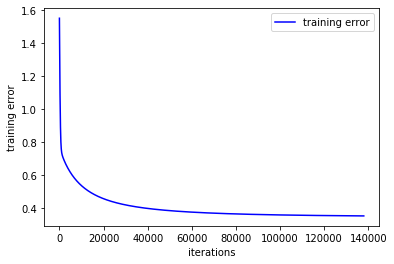

In [81]:
step = [i for i in range(itercount)]
plt.plot(step, loss ,  label = 'training error', c = 'b')
plt.xlabel("iterations")
plt.ylabel("training error")
plt.legend()
plt.show()

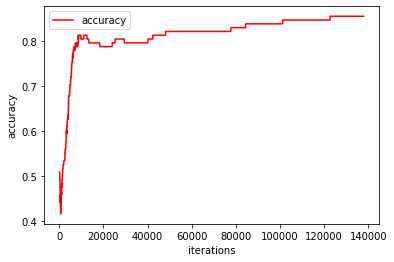

In [82]:
plt.plot(step, accuracy, label = 'accuracy', c = 'r')
plt.xlabel("iterations")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [83]:
print("final training accuracy: ", accuracy[-1]*100, "%")

final training accuracy:  85.59322033898306 %


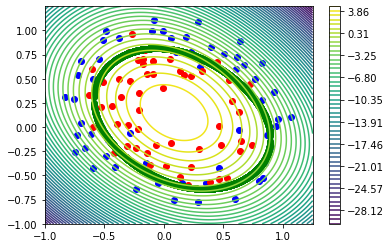

In [86]:
cp = plt.contour(X, Y, Z, 
                 levels = np.linspace(Z.reshape(-1, 1).min(), Z.reshape(-1, 1).max(), 50)
                )
plt.colorbar(cp)

plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.scatter(boundary[:,0], boundary[:,1], c='g')
X = np.arange(-1,1.25,0.001)
Y = np.arange(-1,1.25,0.001)
XX,YY = np.meshgrid(X,Y)
Z = g(t0, t1, t2, t3, t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15, XX,YY)
plt.show()